In [1]:
import yfinance as yf

In [12]:
data = yf.download("^BVSP", start="2012-01-01", end="2025-08-01")

/tmp/ipython-input-3601704479.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("^BVSP", start="2012-01-01", end="2025-08-01")
[*********************100%***********************]  1 of 1 completed


In [13]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,^BVSP,^BVSP,^BVSP,^BVSP,^BVSP
Date,,,,,
2012-01-03,59265.0,59288.0,57836.0,57836.0,3083000
2012-01-04,59365.0,59519.0,58558.0,59263.0,2252000
2012-01-05,58546.0,59354.0,57963.0,59354.0,2351200
2012-01-06,58600.0,59261.0,58355.0,58565.0,1659200
2012-01-09,59083.0,59220.0,58599.0,58601.0,2244600


In [5]:
type(data)

pandas.core.frame.DataFrame

In [14]:
data.columns

MultiIndex([( 'Close', '^BVSP'),
            (  'High', '^BVSP'),
            (   'Low', '^BVSP'),
            (  'Open', '^BVSP'),
            ('Volume', '^BVSP')],
           names=['Price', 'Ticker'])

In [18]:
data.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

In [19]:
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2012-01-03,59265.0,59288.0,57836.0,57836.0,3083000
2012-01-04,59365.0,59519.0,58558.0,59263.0,2252000
2012-01-05,58546.0,59354.0,57963.0,59354.0,2351200
2012-01-06,58600.0,59261.0,58355.0,58565.0,1659200
2012-01-09,59083.0,59220.0,58599.0,58601.0,2244600


In [20]:
data.isna().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [22]:
data.isnull().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [23]:
data.dtypes

,0
Close,float64
High,float64
Low,float64
Open,float64
Volume,int64


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
colunas = data.select_dtypes(include=['float64', 'int64']).columns
num_colunas = int(len(colunas) /2)
num_colunas

2

In [33]:
# Configuração dos gráficos
#df = data

# Suprimir warnings
import warnings
warnings.filterwarnings("ignore")

def plot_hist_box(df):
  colunas = df.select_dtypes(include=['float64', 'int64']).columns
  num_rows = len(colunas) # One row per column for side-by-side plots
  fig, axes = plt.subplots(num_rows, 2, figsize=(16, 4 * num_rows))

  # Plotar histograma e boxplot para cada coluna
  for i, coluna in enumerate(colunas):
      sns.histplot(df[coluna], kde=True, ax=axes[i][0])
      axes[i, 0].set_title(f'Histograma de {coluna}')

      sns.boxplot(x=df[coluna], ax=axes[i][1])
      axes[i, 1].set_title(f'Boxplot de {coluna}')

  # Ajustar layout
  plt.tight_layout()
  plt.show();

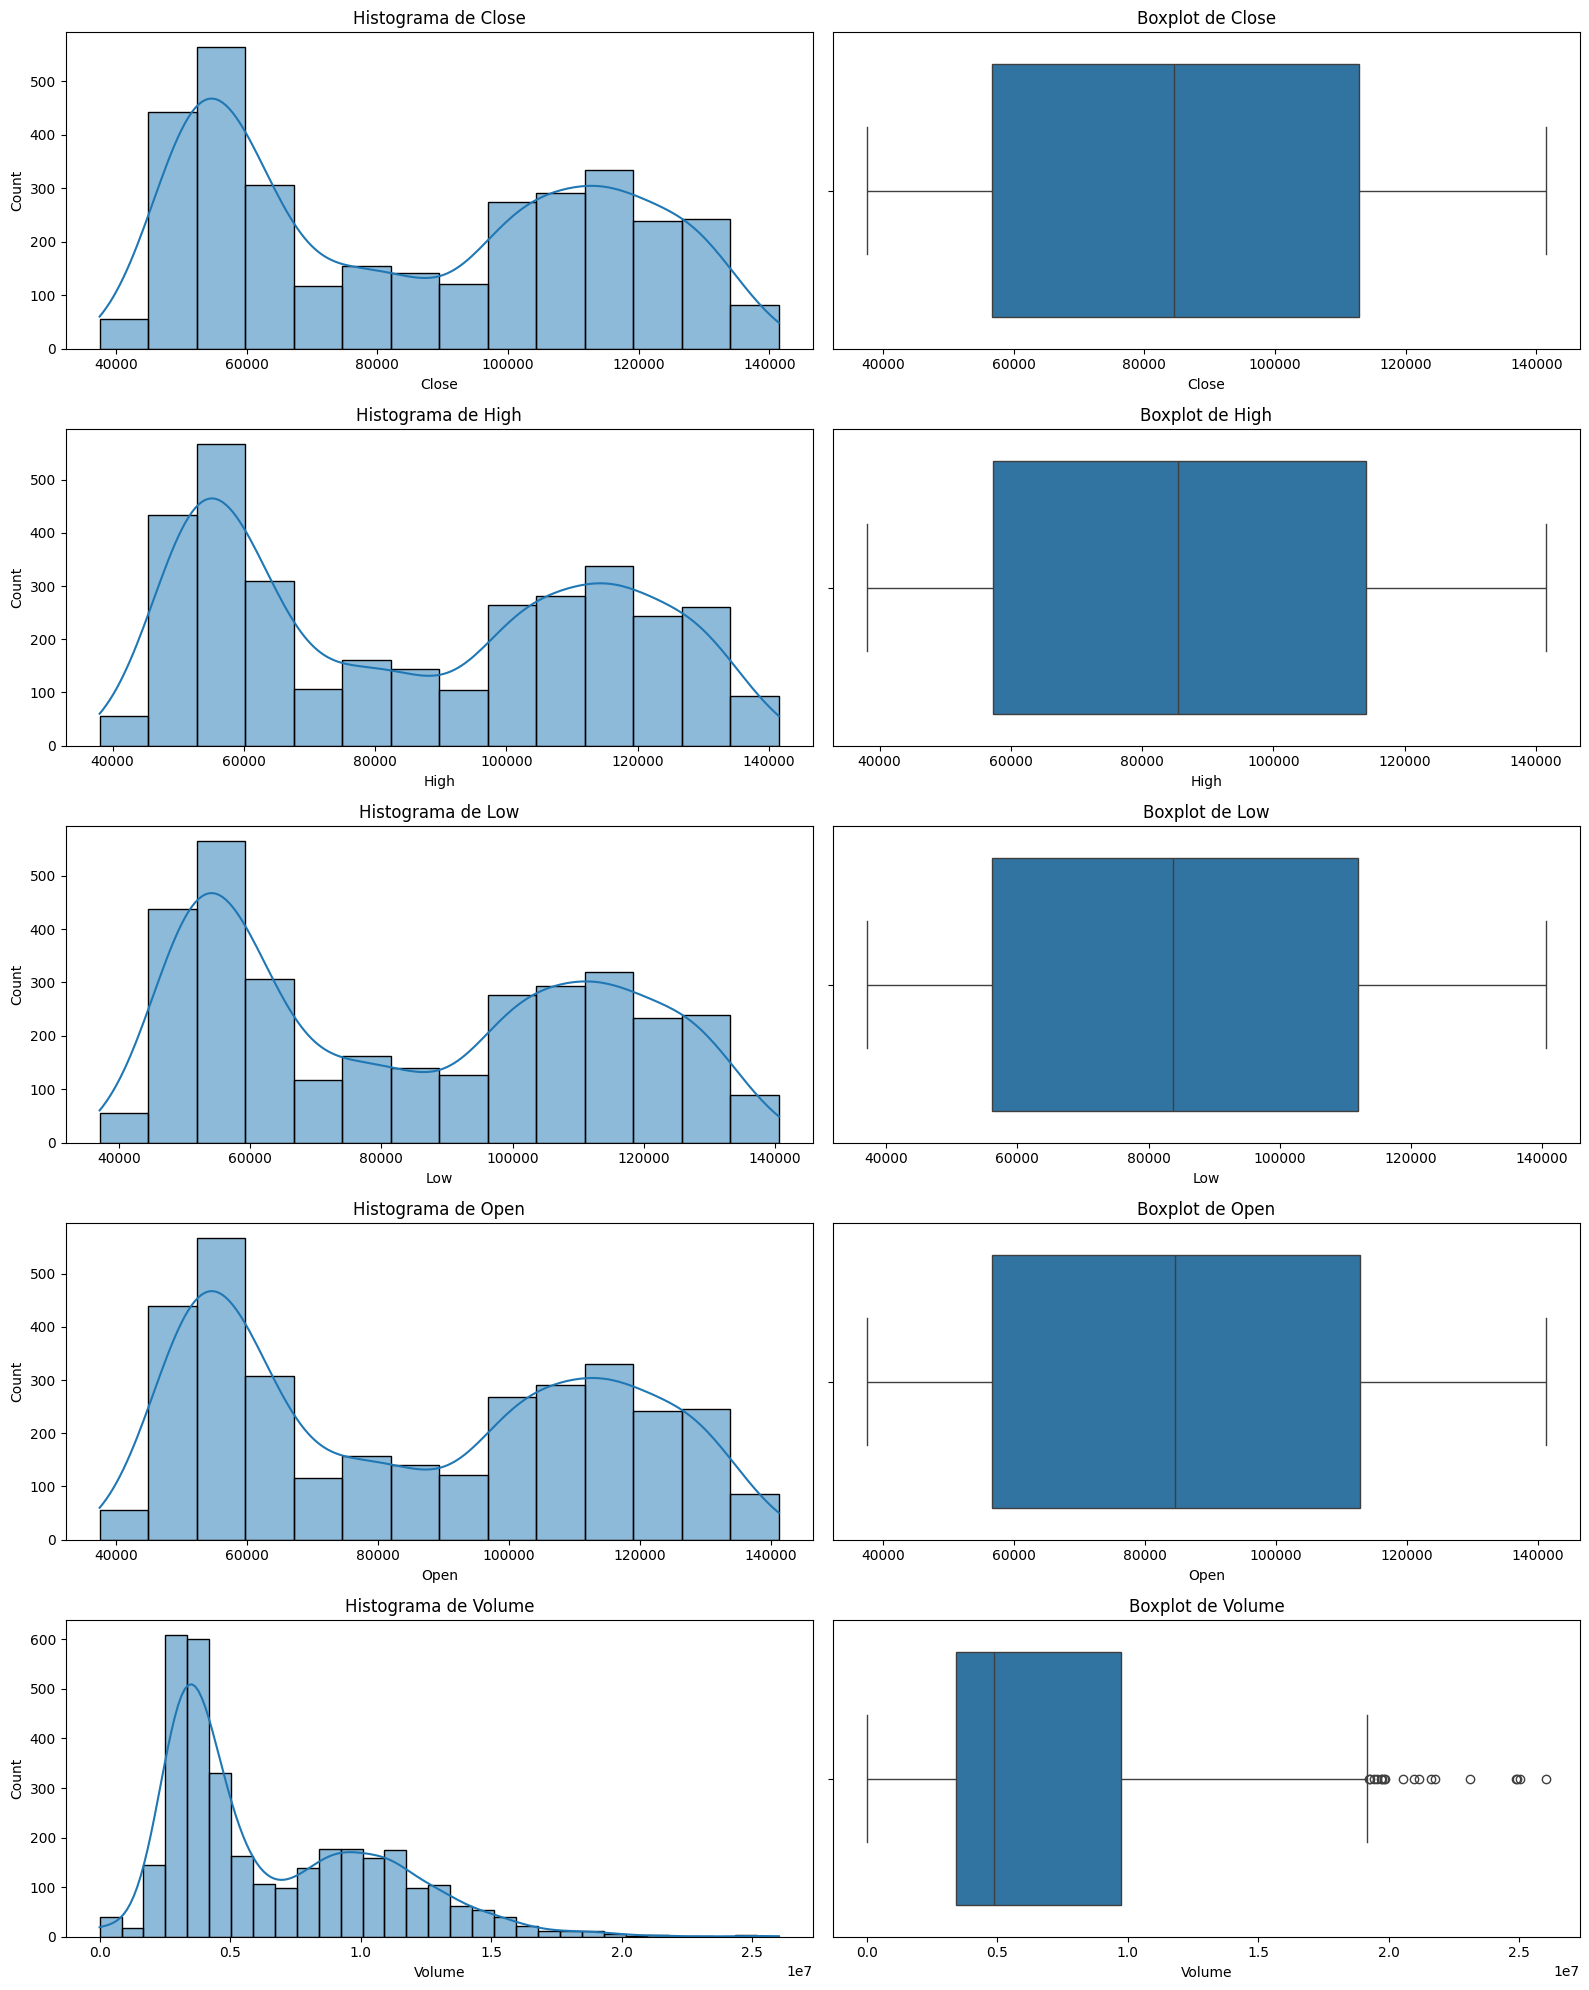

In [34]:
plot_hist_box(data)